# Compare Snow Cover Extent products

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


## NOAA CDR vs new

NOAA Climate Data Record (CDR) of Northern Hemisphere (NH) Snow Cover Extent (SCE), Version 1

### Links:
- https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00756
- https://www.ncdc.noaa.gov/cdr/terrestrial/snow-cover-extent-northern-hemisphere
- https://www.ncei.noaa.gov/data/snow-cover-extent/access/


### Paths

- Local: `lalandmi@EthAdaptator:~/data/NOAA_CDR_NH_SCE`
- CICLAD: `mlalande@ciclad-ng:/data/mlalande/RUTGERS`

### Products

- `nhsce_v01r01_19661004_20201005.nc` (data access: 15/10/2020)
- `nhsce_v01r01_19661004_20191202.nc` (data access: 05/12/2019)
- `G10035-rutgers-nh-24km-weekly-sce-v01r00-19800826-20200831_newer.nc` (provided by Lawrence Mudryk - lawrence.mudryk@canada.ca 15/04/2021 not official)

In [44]:
path = '/data/mlalande/RUTGERS/'
file1 = 'nhsce_v01r01_19661004_20201005.nc'
file2 = 'G10035-rutgers-nh-24km-weekly-sce-v01r00-19800826-20200831_newer.nc'

In [45]:
ds1 = xr.open_dataset(path+file1)
ds2 = xr.open_dataset(path+file2)

In [46]:
ds1

<xarray.Dataset>
Dimensions:               (cols: 88, rows: 88, time: 2818)
Coordinates:
  * time                  (time) datetime64[ns] 1966-10-10 ... 2020-10-05
    snow_cover_threshold  float32 ...
    latitude              (rows, cols) float64 ...
    longitude             (rows, cols) float64 ...
Dimensions without coordinates: cols, rows
Data variables:
    coord_system          |S1 ...
    land                  (rows, cols) float32 ...
    area                  (rows, cols) float32 ...
    snow_cover_extent     (time, rows, cols) float32 ...
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, NOAA C...
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        nhsce_v01r01_19661004_20201005.nc
    naming_authority:          gov.noaa.ncdc
    metadata_link:             https://doi.org/10.7289/V5N014G9
    title:                     Climate Data Record (CDR) of Northern Hemisphe...
    product_version:           v01r01
    summary:                   The data record for the NH SCE CDR spans from ...
    keywords:                  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE > SNOW C...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Ear...
    platform:                  ESSA, NOAA POES, SMS, DMSP, GOES, TIROS, METEO...
    sensor:                    VIDEO CAMERA, VISSR, VAS, VHRR, AVHRR, VISSR-G...
    cdm_data_type:             Grid
    cdr_program:               NOAA Climate Data Record Program for satellites
    cdr_variable:              snow_cover_extent
    source:                    NOAA NH Weekly SCE, NIC NH IMS SCE
    date_created:              2020-10-08T15:46:00Z
    institution:               Global Snow Lab, Center for Environmental Pred...
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    geospatial_lat_min:        0.0
    geospatial_lat_max:        90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        180.0
    spatial_resolution:        Minimum cell area 10676.8 km^2, maximum cell a...
    time_coverage_start:       1966-10-04
    time_coverage_end:         2020-10-05
    license:                   No restrictions on access or use

In [49]:
ds2

<xarray.Dataset>
Dimensions:               (time: 2088, x: 1024, y: 1024)
Coordinates:
  * time                  (time) datetime64[ns] 1980-09-01 ... 2020-08-31
    snow_cover_threshold  float32 ...
    latitude              (y, x) float64 ...
    longitude             (y, x) float64 ...
  * x                     (x) float32 -12114.755 -12091.07 ... 12114.998
  * y                     (y) float32 12114.998 12091.313 ... -12114.755
Data variables:
    crs                   int32 ...
    land                  (y, x) int8 -127 -127 -127 -127 ... -127 -127 -127
    area                  (y, x) float32 ...
    snow_cover_extent     (time, y, x) int8 ...
Attributes:
    Conventions:               CF-1.7
    standard_name_vocabulary:  CF Standard Name Table (v75, 15 September 2020)
    id:                        G10035-rutgers-nh-24km-weekly-sce-v01r00-19800...
    references:                https://doi.org/10.7265/zzbm-2w05
    title:                     Rutgers Northern Hemisphere (NH) 24km Weekly S...
    product_version:           v01r00
    summary:                   The data record for the Rutgers NH 24km Weekly...
    keywords:                  CRYOSPHERE > SNOW/ICE > SNOW COVER, TERRESTRIA...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Ear...
    platform:                  NOAA POES, DMSP, GOES, TIROS, METEOSAT, GMS, T...
    sensor:                    VISSR, VAS, AVHRR, MVIRI, SEVIRI, MODIS, AMSU-...
    cdm_data_type:             Grid
    cdr_variable:              snow_cover_extent
    source:                    NOAA NH Weekly SCE, NIC NH IMS SCE
    date_created:              2021-02-26T13:58:01Z
    creator_name:              Global Snow Lab, Center for Environmental Pred...
    creator_email:             support@snowcover.org
    creator_url:               https://snowcover.org
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    geospatial_lat_min:        0.0
    geospatial_lat_max:        90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        180.0
    spatial_resolution:        Minimum cell area 158.9 km^2, maximum cell are...
    time_coverage_start:       1980-08-26
    time_coverage_end:         2020-08-31
    license:                   No restrictions on access or use

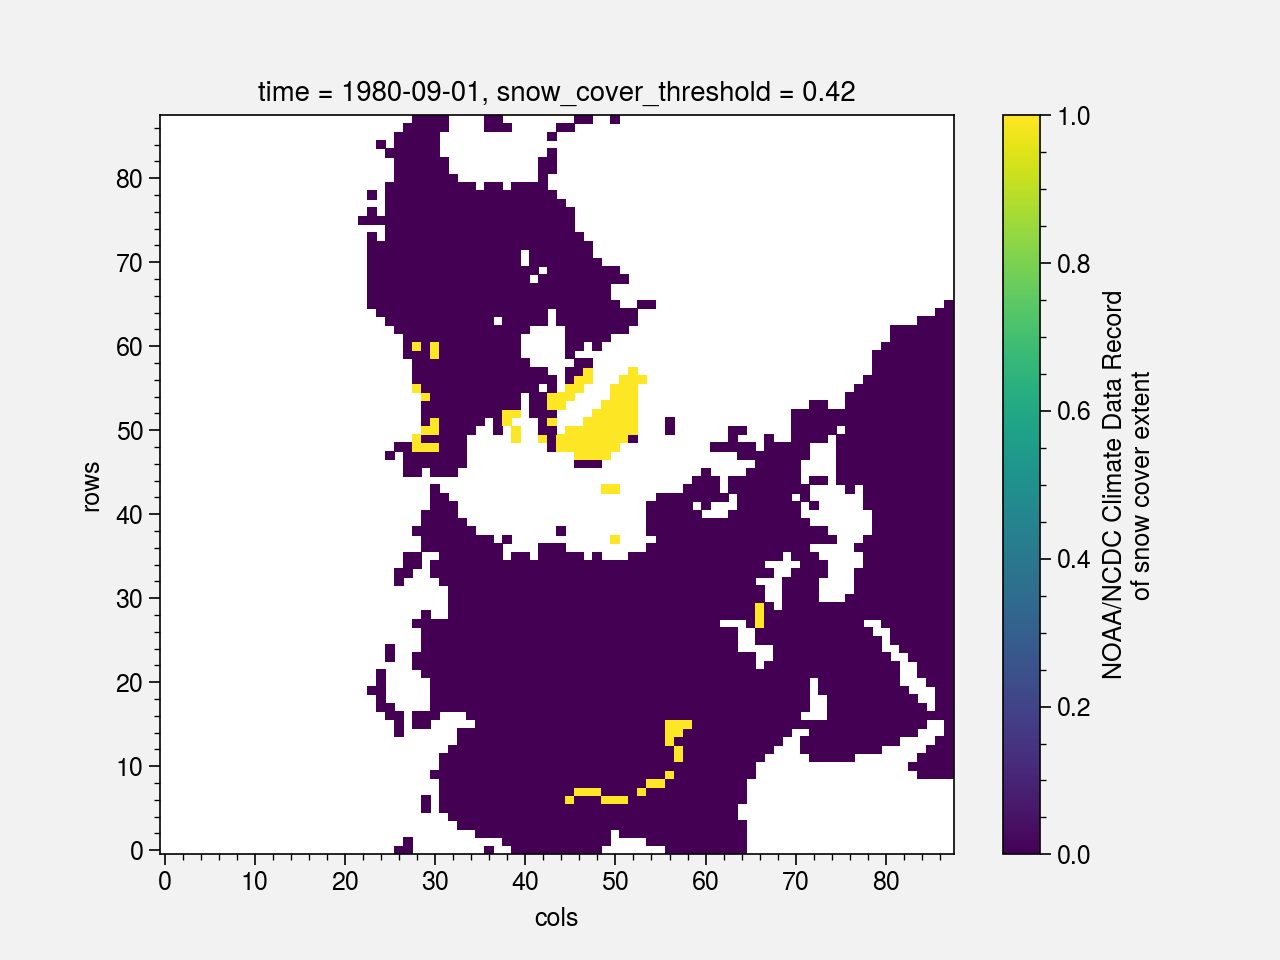

In [47]:
ds1.snow_cover_extent.sel(time='1980-09-01').where(ds1.land == 1).plot()

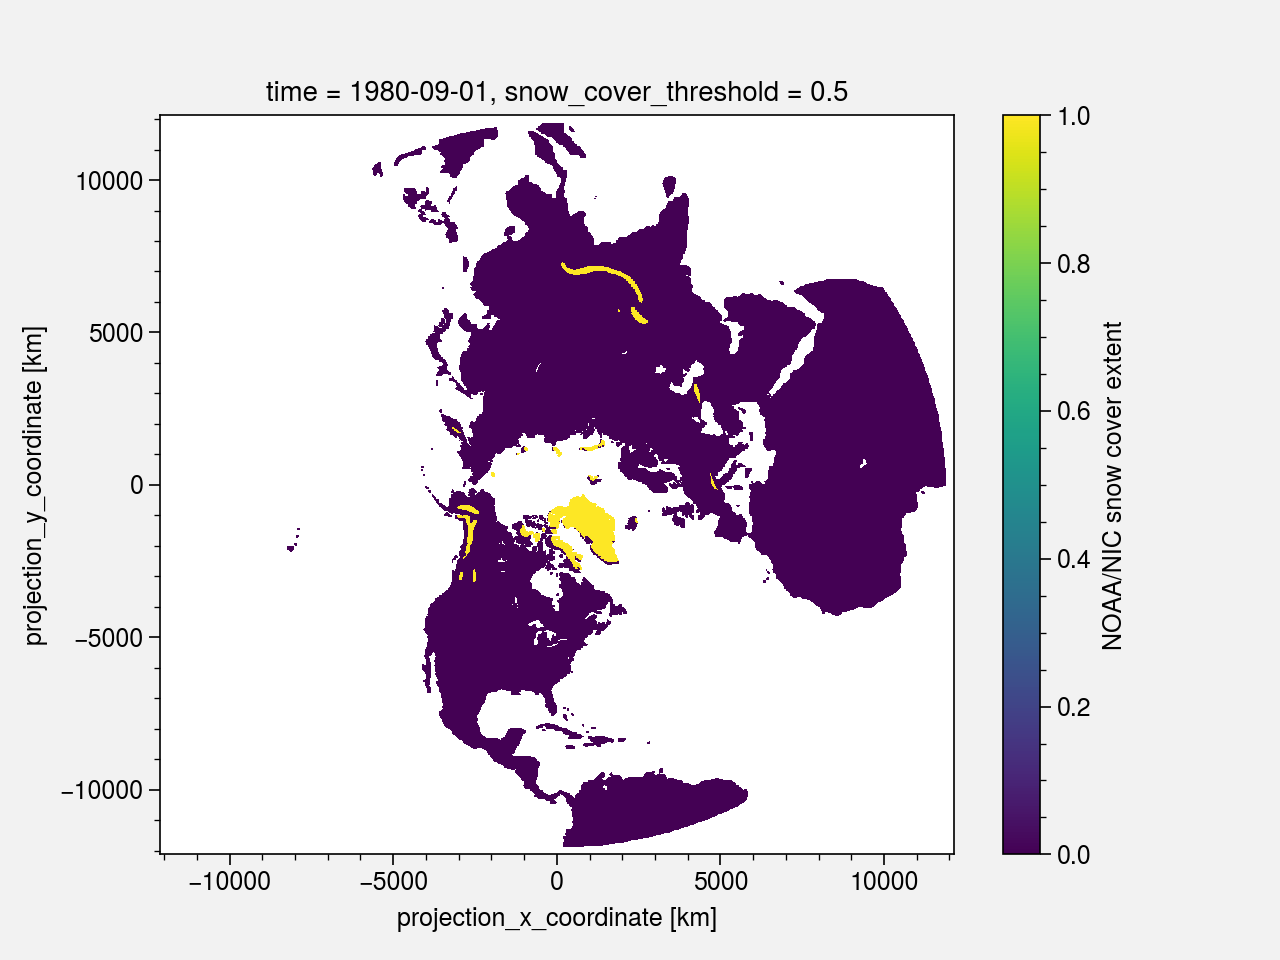

In [48]:
ds2.snow_cover_extent.sel(time='1980-09-01').where(ds2.land == 1).plot()

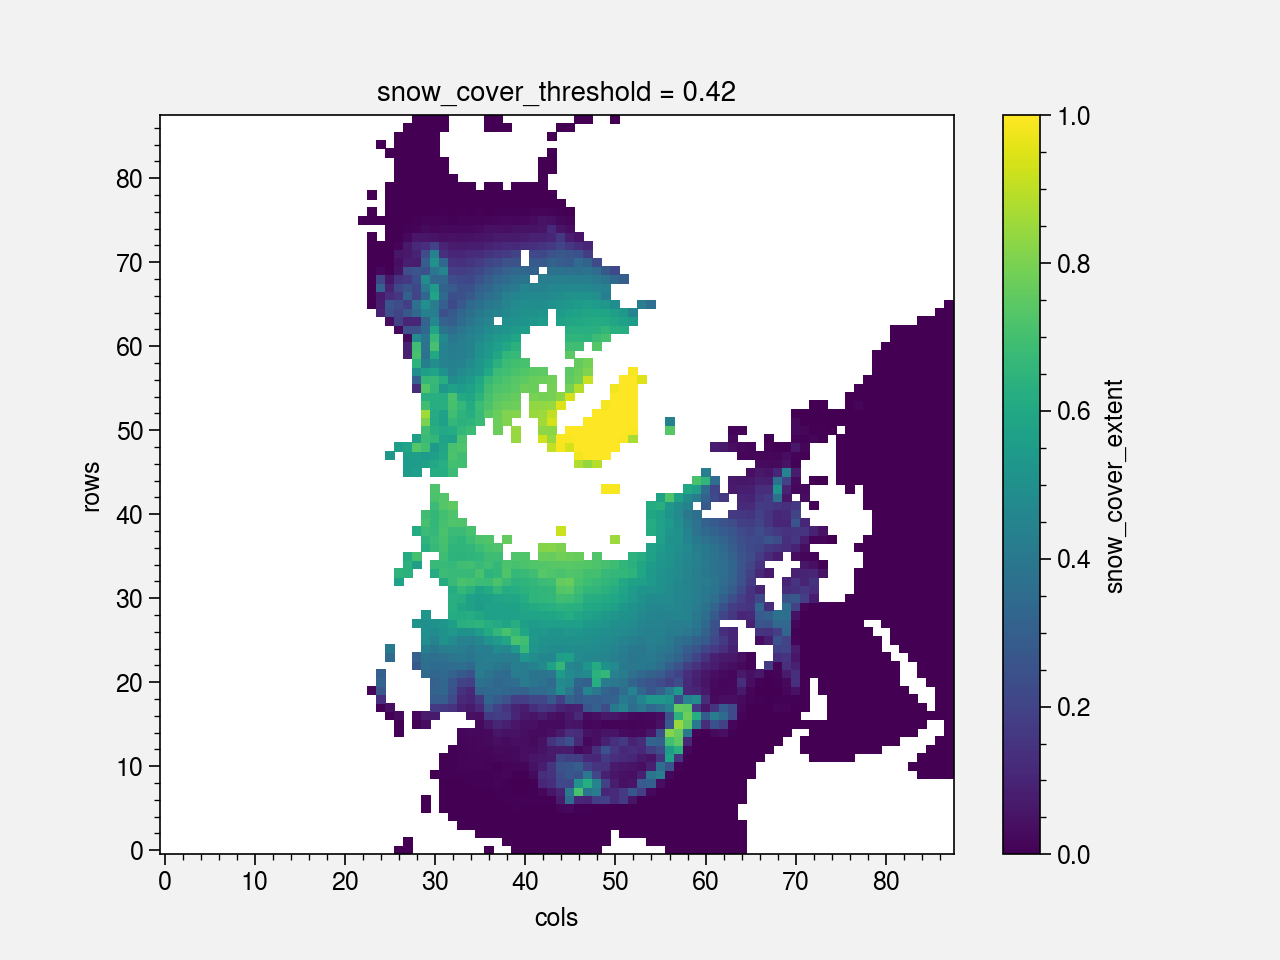

In [50]:
ds1.snow_cover_extent.sel(time=slice('1980','2019')).mean('time').where(ds1.land == 1).plot()

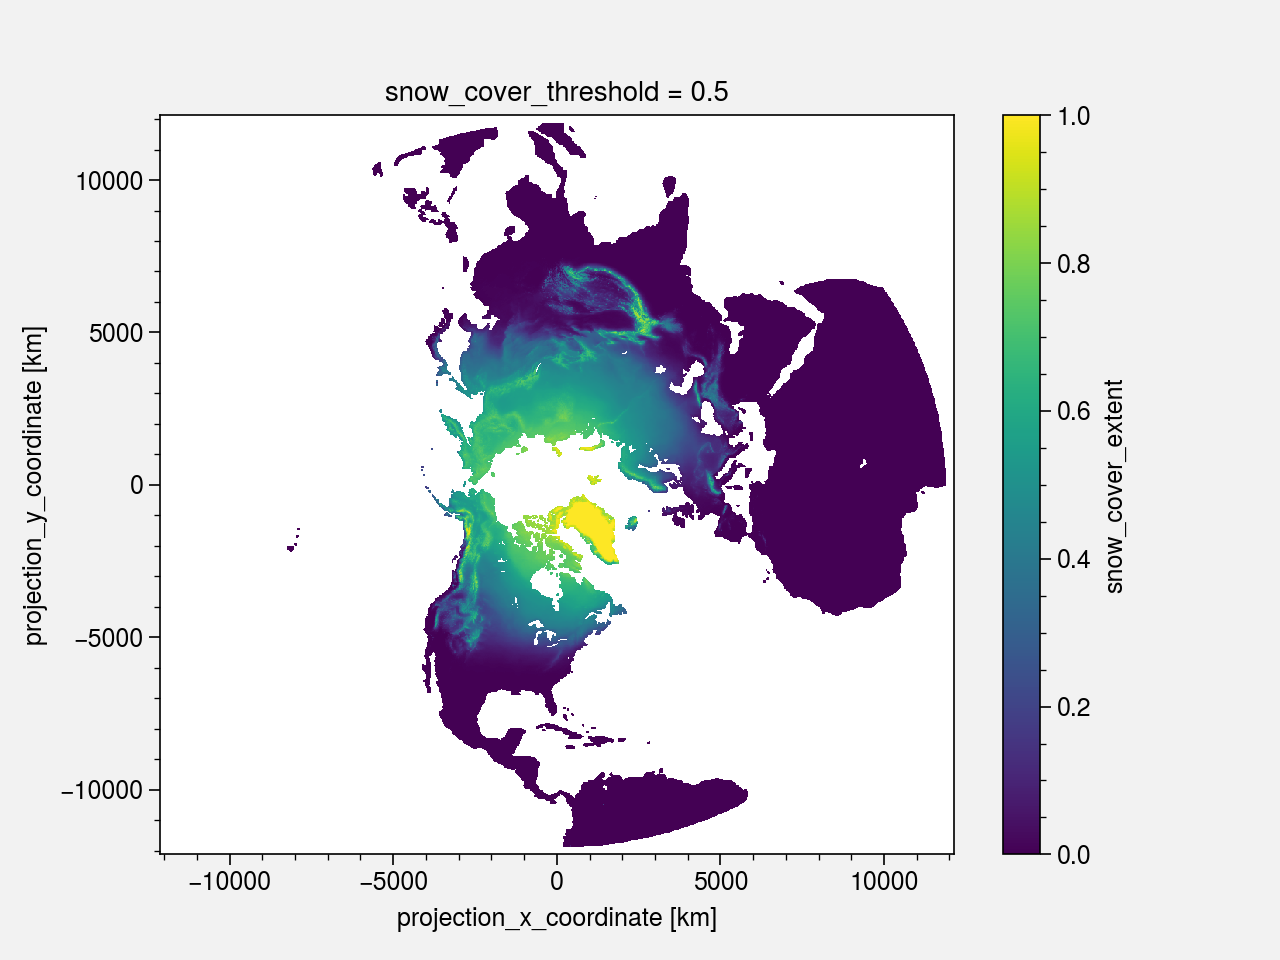

In [51]:
ds2.snow_cover_extent.sel(time=slice('1980','2019')).mean('time').where(ds2.land == 1).plot()

## Compare 